In [1]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks[:5]

['X', 'AAPL', 'BAC', 'NVDA', 'GOOG']

In [5]:
from datetime import datetime
import pytz
import pandas as pd
datetime.fromtimestamp(1488132100, tz=pytz.timezone('EST')), datetime.fromtimestamp(1486404100)

(datetime.datetime(2017, 2, 26, 13, 1, 40, tzinfo=<StaticTzInfo 'EST'>),
 datetime.datetime(2017, 2, 6, 20, 1, 40))

In [39]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np
import requests

def get_data(symbol):
    timezone = pytz.timezone("EST")
    today = datetime.now(tz=timezone).replace(hour=9, minute=0, second=0, microsecond=0)
    days = 11
    while True:
        start = today - timedelta(days=days)
        url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
              "&interval=1m&indicators=quote&includeTimestamps=true&"\
              "events=div%7Csplit%7Cearn".format(symbol, start.timestamp(), today.timestamp())
        page = requests.get(url)
        chart = page.json()['chart']
        
        if chart['error']:
            print(chart['error'])
            break

        result = chart['result'][0]
        periods_len = len(result['meta']['tradingPeriods'])
        print(days)
        if periods_len >= 9:
            df = pd.DataFrame(
                result['indicators']['quote'][0],
                index=[datetime.fromtimestamp(t, tz=timezone) for t in result['timestamp']],
            )
            return df[df.volume.notnull()]
        else:
            days += 1
            
dd = get_data("GOOG")
dd

11
12
13


,close,high,low,open,volume
2017-02-13 09:30:00-05:00,816.230042,816.230042,815.665039,815.929993,0.0
2017-02-13 09:31:00-05:00,816.339966,816.339966,816.060059,816.339966,7860.0
2017-02-13 09:32:00-05:00,817.539978,817.539978,816.760010,816.760010,9832.0
2017-02-13 09:33:00-05:00,817.889954,817.889954,817.599976,817.599976,8589.0
2017-02-13 09:34:00-05:00,817.479980,817.599976,817.000000,817.599976,7537.0
2017-02-13 09:35:00-05:00,816.690002,817.354980,816.690002,817.354980,5726.0
2017-02-13 09:36:00-05:00,816.989990,816.989990,816.989990,816.989990,3369.0
2017-02-13 09:37:00-05:00,816.000000,816.880005,816.000000,816.880005,5199.0
2017-02-13 09:38:00-05:00,816.400024,816.400024,816.400024,816.400024,2080.0
2017-02-13 09:39:00-05:00,816.919983,816.919983,816.540039,816.540039,4968.0


In [40]:
dd_len = len(dd)
dd['avg9days'] = dd.volume.rolling(window=dd_len, min_periods=1).mean()
dd['current_score'] = dd.volume / dd.avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

,close,high,low,open,volume,avg9days,current_score,rolling_score
2017-02-13 09:30:00-05:00,816.230042,816.230042,815.665039,815.929993,0.0,0.000000,NaN,NaN
2017-02-13 09:31:00-05:00,816.339966,816.339966,816.060059,816.339966,7860.0,3930.000000,2.000000,2.000000
2017-02-13 09:32:00-05:00,817.539978,817.539978,816.760010,816.760010,9832.0,5897.333333,1.667194,1.833597
2017-02-13 09:33:00-05:00,817.889954,817.889954,817.599976,817.599976,8589.0,6570.250000,1.307256,1.658150
2017-02-13 09:34:00-05:00,817.479980,817.599976,817.000000,817.599976,7537.0,6763.600000,1.114347,1.522199
2017-02-13 09:35:00-05:00,816.690002,817.354980,816.690002,817.354980,5726.0,6590.666667,0.868804,1.391520
2017-02-13 09:36:00-05:00,816.989990,816.989990,816.989990,816.989990,3369.0,6130.428571,0.549554,1.251193
2017-02-13 09:37:00-05:00,816.000000,816.880005,816.000000,816.880005,5199.0,6014.000000,0.864483,1.195948
2017-02-13 09:38:00-05:00,816.400024,816.400024,816.400024,816.400024,2080.0,5576.888889,0.372968,1.093076
2017-02-13 09:39:00-05:00,816.919983,816.919983,816.540039,816.540039,4968.0,5516.000000,0.900653,1.071695


too much data


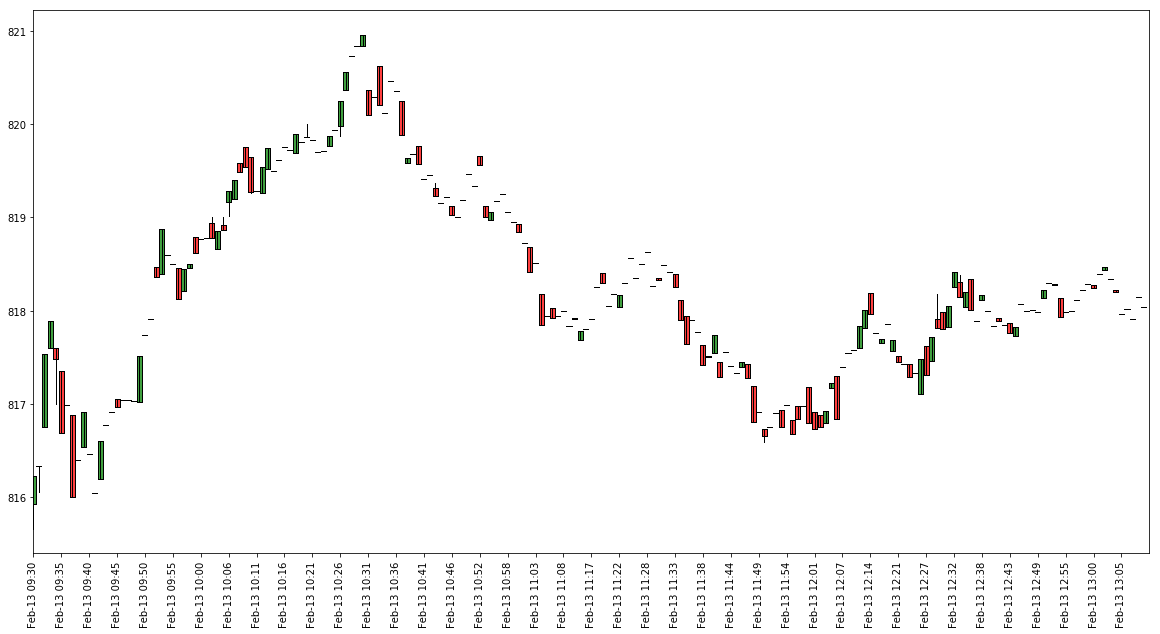

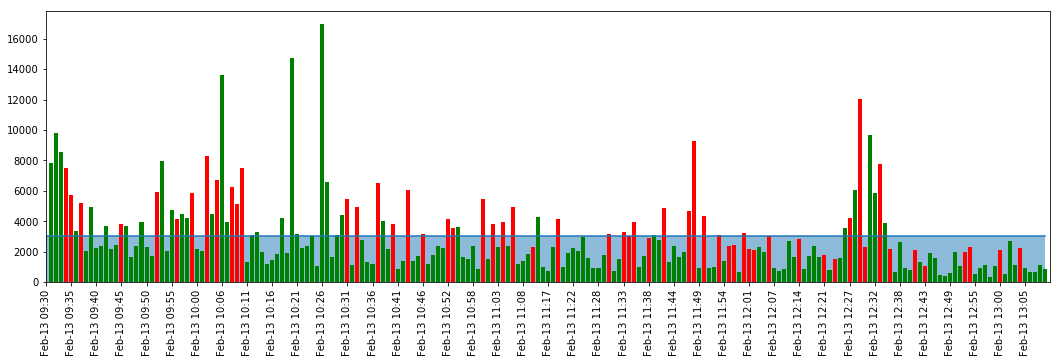

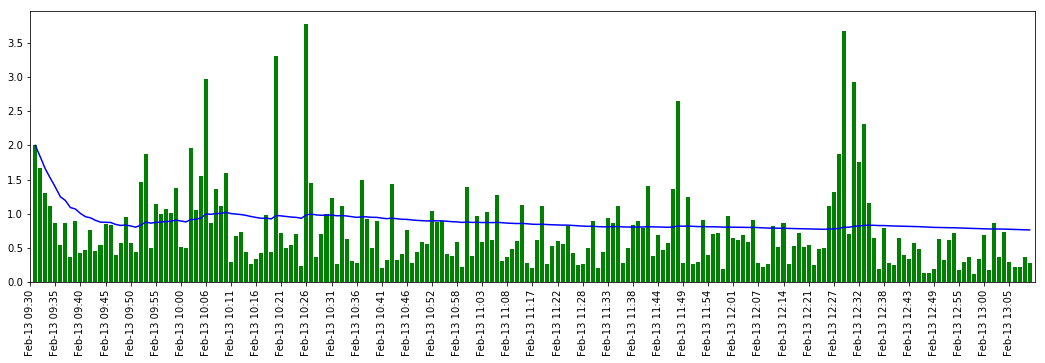

In [69]:
from matplotlib.finance import candlestick_ochl, candlestick2_ochl
from matplotlib.dates import date2num, num2date, DateFormatter
from matplotlib import pyplot as plt
import numpy as np


def display_charts(df):
    if len(df) > 200:
        print('too much data')
        df = df[:200]
    index = df.index
    xticks = [n for n in range(0, len(index), 5)]
    df = df.reset_index()
    
    # plot data
    fig = plt.figure(figsize=(20, 10)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([index[i].strftime('%b-%d %H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(0, len(index))
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center') 
    ax2.bar(negative.index, negative.volume, color='red', align='center')
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([index[i].strftime('%b-%d %H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(0, len(df))
    # average volume
    value = df.avg9days.iloc[-1]
    av_x, av_y = df.index, [value for i in range(len(df.index))]
    ax2.plot(av_x, av_y)
    ax2.fill_between(av_x, 0, av_y, alpha=.5)
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(df.index, df.current_score, color='green', align='center') 
    ax3.plot(df.index, df.rolling_score, color='blue') 
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([index[i].strftime('%b-%d %H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(0, len(df))
    
    plt.show()

display_charts(dd)